##### Import & Seed:

In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
#from sklearn.linear_model import Lasso

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from data import SINDy_data
from data import data
from data import equations

# Seed:
np.random.seed(999)

### STD

In [2]:
# Select ODE & settings:
ode_name = 'SelkovODE'
ode_param=None
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 2
dim_k = 0
ode = equations.get_ode(ode_name, ode_param)

In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
file_path = 'saved/data/selkov_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 150, 2) (50, 150, 2) (0,)
['X0', 'X1']


In [4]:
# uploda data:
file_path = 'saved/data/selkov_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

Threshold:  0.005 , RMSE:  0.008847060783402926
Threshold:  0.01 , RMSE:  0.006365654071433577
Threshold:  0.03 , RMSE:  0.003786792225778627
Threshold:  0.05 , RMSE:  0.003786792225778627
Threshold:  0.07 , RMSE:  0.003786792225778627
Threshold:  0.09 , RMSE:  0.003786792225778627
Threshold:  0.1 , RMSE:  0.13444207415558945
Threshold:  0.2 , RMSE:  2.5942818157077516


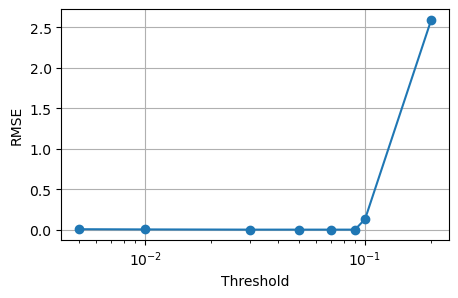

In [ ]:
# model selection:
#RMK. in questo caso settiamo include_bias=True perche' nel modello è presente un termine costante rispetto alle variabili e il parametro forniti
thresholds = np.array([0.005, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2])
rmse_values = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=True), optimizer=ps.STLSQ(threshold=thresholds[i]))
    model.fit(X_list, t=dt, multiple_trajectories=True, x_dot=dX_list)
    rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, 10, [0.1, 0.1], [0, 0], dim_k)
    rmse_values[i] = rmse
    print('Threshold: ', thresholds[i], ', RMSE: ', rmse)

plt.figure(figsize=(5, 3))
plt.plot(thresholds, rmse_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.show()

# -> best threshold: 0.09

In [7]:
# final model:
print('SINDy model:')
polynomial_library = ps.PolynomialLibrary(degree = 3, include_bias=True)
model = ps.SINDy(feature_names  = feature_names, feature_library= polynomial_library, optimizer=ps.STLSQ(threshold=0.09))
model.fit(X_list, t=dt, multiple_trajectories=True, x_dot = dX_list)
model.print()


# library:
print('')
length = 0
#print('library:')
library_terms = polynomial_library.get_feature_names(input_features=feature_names)
for term in library_terms:
    print(term)
    length += 1
print('length:', length)

SINDy model:
(X0)' = 0.748 1 + -0.099 X0 + -0.999 X0 X1^2
(X1)' = 0.100 X0 + -0.996 X1 + 0.996 X0 X1^2

1
X0
X1
X0^2
X0 X1
X1^2
X0^3
X0^2 X1
X0 X1^2
X1^3
length: 10


Best Model 1 RMSE:  0.0037911456026811334


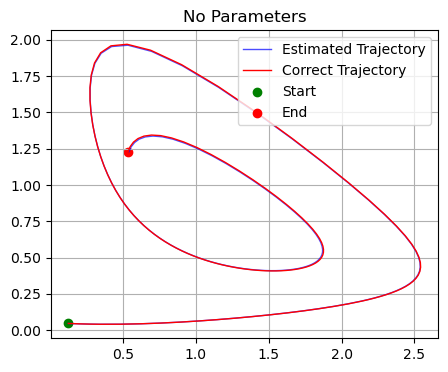

In [8]:
# evaluation
n_sample = 25
rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, n_sample, [0.1, 0.1], [0, 0], dim_k)
print('Best Model 1 RMSE: ', rmse)

n_sample = 1
title = r'No Parameters'
SINDy_data.evaluate_traj(model, ode, freq, n_sample, [0.05, 0.05], [0.05, 0.05], dim_x, dim_k, title=title)

### Parametrization on $\rho$

In [2]:
# Select ODE & settings:
ode_name = 'SelkovODE_rho'
ode_param=None
freq = 10
dt = 1 / freq
n_sample = 50
noise_ratio = 0.01
dim_x = 2
dim_k = 1
ode = equations.get_ode(ode_name, ode_param)

In [7]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
file_path = 'saved/data/selkov_data_rho.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 300, 2) (50, 300, 2) (50, 300)
['X0', 'X1', 'X2']


In [3]:
# uploda data:
file_path = 'saved/data/selkov_data_rho_50.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

Threshold:  0.001 , RMSE:  0.010668854661603399
Threshold:  0.01 , RMSE:  0.009959370058350084
Threshold:  0.04 , RMSE:  0.0070412826818705716
Threshold:  0.05 , RMSE:  0.012334165575912824
Threshold:  0.07 , RMSE:  0.19738264689796328
Threshold:  0.09 , RMSE:  0.19738264689796328
Threshold:  0.1 , RMSE:  0.19738264689796328
Threshold:  0.2 , RMSE:  5.25542242559534
Threshold:  0.4 , RMSE:  5.266094459395955


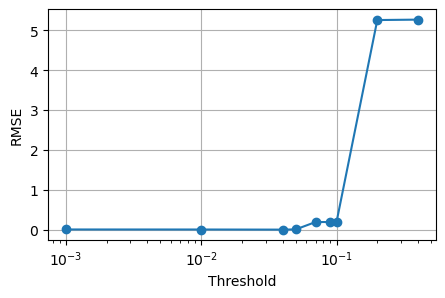

In [12]:
# model selection:
thresholds = np.array([0.001, 0.01, 0.04, 0.05, 0.07, 0.09, 0.1, 0.2])
rmse_values = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=False), optimizer=ps.STLSQ(threshold=thresholds[i]))
    model.fit(X_list, t=dt, multiple_trajectories=True, u=param_list, x_dot=dX_list)
    rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, 10, [0.1, 0.1, 0.8], [0, 0, 0.7])
    rmse_values[i] = rmse
    print('Threshold: ', thresholds[i], ', RMSE: ', rmse)   

plt.figure(figsize=(5, 3))
plt.plot(thresholds, rmse_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.show()

# -> best_thresholds: 0.04, 0.05

In [13]:
# best models:

print('SINDy model:')
best_threshold_2 = 0.04
model_rho_2 = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=False), optimizer=ps.STLSQ(threshold=best_threshold_2))
model_rho_2.fit(X_list, t=dt, multiple_trajectories=True, u=param_list, x_dot=dX_list)
model_rho_2.print()

# best_threshold = 0.09
# model_rho = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=False), optimizer=ps.STLSQ(threshold=best_threshold))
# model_rho.fit(X_list, t=dt, multiple_trajectories=True, u=param_list, x_dot=dX_list)
# model_rho.print()

# best_threshold_1 = 0.05
# model_rho_1 = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=False), optimizer=ps.STLSQ(threshold=best_threshold_1))
# model_rho_1.fit(X_list, t=dt, multiple_trajectories=True, u=param_list, x_dot=dX_list)
# model_rho_1.print()


SINDy model:
(X0)' = -0.100 X0 + 1.032 X2 + -0.037 X2^2 + -0.999 X0 X1^2 + -0.010 X2^3
(X1)' = 0.100 X0 + -1.167 X1 + 0.444 X1 X2 + 0.997 X0 X1^2 + -0.289 X1 X2^2


Best Model RMSE:  0.006618132376914614


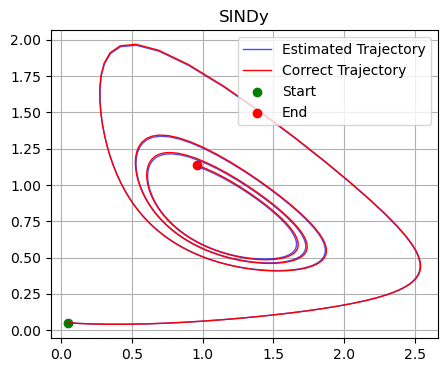

In [14]:
# evaluation:

n_sample = 25
rmse_rho_2, _ = SINDy_data.evaluate_RMSE(model_rho_2, ode, freq, n_sample, [0.1, 0.1, 0.8], [0, 0, 0.7])
print('Best Model RMSE: ', rmse_rho_2)
# rmse_rho, _ = SINDy_data.evaluate_RMSE(model_rho, ode, freq, n_sample, [0.1, 0.1, 0.8], [0, 0, 0.7])
# print('Best Model RMSE: ', rmse_rho)
# rmse_rho_1, _ = SINDy_data.evaluate_RMSE(model_rho_1, ode, freq, n_sample, [0.1, 0.1, 0.8], [0, 0, 0.7])
# print('Best Model 1 RMSE: ', rmse_rho_1)

n_sample = 1
title = r'SINDy'
SINDy_data.evaluate_traj(model_rho_2, ode, freq, n_sample, [0.05, 0.05, 0.75], [0.05, 0.05, 0.75], dim_x, title=title)
# SINDy_data.evaluate_traj(model_rho, ode, freq, n_sample, [0.05, 0.05, 0.75], [0.05, 0.05, 0.75], dim_x, title=title)
# SINDy_data.evaluate_traj(model_rho_1, ode, freq, n_sample, [0.05, 0.05, 0.75], [0.05, 0.05, 0.75], dim_x, title=title)

$\rho \simeq 0.9$, RMSE:  0.03251716785070926
$\rho \simeq 0.6$, RMSE:  0.016600810120341532
$\rho \simeq 0.4$, RMSE:  0.03725404115381708


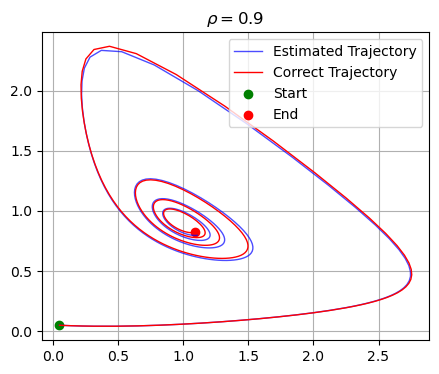

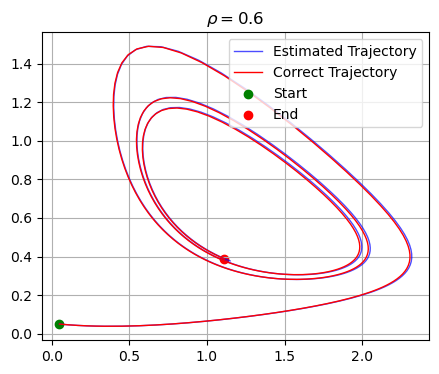

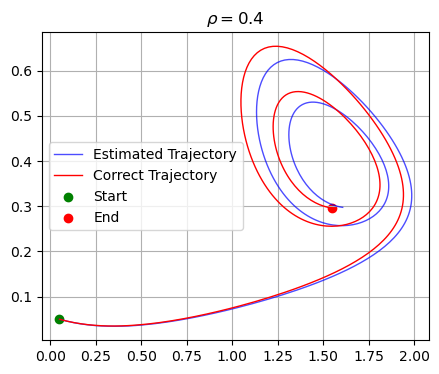

In [15]:
# Best Model 2, test on different parameter values:

# rho = 0.9
n_sample = 25
rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_2, ode, freq, n_sample, [0.1, 0.1, 0.95], [0, 0, 0.85])
print(r'$\rho \simeq 0.9$, RMSE: ', rmse_0)
n_sample = 1
init_point = [0.05, 0.05, 0.9]
#rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_1, ode, freq, n_sample, init_point, init_point)
#print('rho=0.9, RMSE: ', rmse_0)
title = r'$\rho = 0.9$'
SINDy_data.evaluate_traj(model_rho_2, ode, freq, n_sample, init_point, init_point, dim_x, title=title)

# rho = 0.6
n_sample = 25
rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_2, ode, freq, n_sample, [0.1, 0.1, 0.65], [0, 0, 0.55])
print(r'$\rho \simeq 0.6$, RMSE: ', rmse_0)
n_sample = 1
init_point = [0.05, 0.05, 0.6]
#rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_1, ode, freq, n_sample, init_point, init_point)
#print('rho=0.6, RMSE: ', rmse_0)
title = r'$\rho = 0.6$'
SINDy_data.evaluate_traj(model_rho_2, ode, freq, n_sample, init_point, init_point, dim_x, title=title)

# rho = 0.4
n_sample = 25
rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_2, ode, freq, n_sample, [0.1, 0.1, 0.45], [0, 0, 0.35])
print(r'$\rho \simeq 0.4$, RMSE: ', rmse_0)
n_sample = 1
init_point = [0.05, 0.05, 0.4]
#rmse_0, _ = SINDy_data.evaluate_RMSE(model_rho_1, ode, freq, n_sample, init_point, init_point)
#print('rho=0.4, RMSE: ', rmse_0)
title = r'$\rho = 0.4$'
SINDy_data.evaluate_traj(model_rho_2, ode, freq, n_sample, init_point, init_point, dim_x, title=title)

### Parametrization on $\sigma$

In [2]:
# select ODE & settings:
ode_name = 'SelkovODE_sigma'
ode_param=None
freq = 10
dt = 1 / freq
n_sample = 50 
noise_ratio = 0.01
dim_x = 2
dim_k = 1
ode = equations.get_ode(ode_name, ode_param)

In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# save data:
file_path = 'saved/data/selkov_data_sigma.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 300, 2) (50, 300, 2) (50, 300)
['X0', 'X1', 'X2']


In [4]:
# uploda data:
file_path = 'saved/data/selkov_data_sigma.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

Threshold:  0.01 , RMSE:  0.07852465481547455
Threshold:  0.05 , RMSE:  0.049072535626847394
Threshold:  0.1 , RMSE:  0.04423366645290545
Threshold:  0.2 , RMSE:  0.03352959543667447
Threshold:  0.3 , RMSE:  0.035321059699284445
Threshold:  0.4 , RMSE:  0.04025315511539224
Threshold:  0.6 , RMSE:  0.04025315511539224


/Users/grgromano/miniconda3/envs/smart_SINDy/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.8) and eliminated all coefficients
  warnings.warn(


Threshold:  0.8 , RMSE:  1.0922686000141018


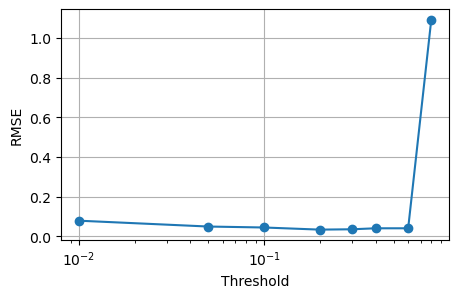

In [5]:
# model selection:
#RMK. in questo caso settiamo include_bias=True perche' nel modello è presente un termine costante rispetto alle variabili e il parametro forniti
thresholds = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
rmse_values = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=3, include_bias=True), optimizer=ps.STLSQ(threshold=thresholds[i]))
    model.fit(X_list, t=dt, multiple_trajectories=True, u=param_list, x_dot=dX_list)
    rmse, _ = SINDy_data.evaluate_RMSE(model, ode, freq, 10, [0.1, 0.1, 0.15], [0, 0, 0.05])
    rmse_values[i] = rmse
    print('Threshold: ', thresholds[i], ', RMSE: ', rmse)

plt.figure(figsize=(5, 3))
plt.plot(thresholds, rmse_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.show()

# -> best_thresholds: 0.2, 0.6

In [8]:
# best models:
print('SINDy model:')
model_sigma = ps.SINDy(feature_names  = feature_names, feature_library= ps.PolynomialLibrary(degree = 3, include_bias=True), optimizer=ps.STLSQ(threshold=0.6))
model_sigma.fit(X_list, t=dt, multiple_trajectories=True, u = param_list, x_dot = dX_list)
model_sigma.print()

#print('')
# model_sigma_1 = ps.SINDy(feature_names  = feature_names, feature_library= ps.PolynomialLibrary(degree = 3, include_bias=True), optimizer=ps.STLSQ(threshold=0.2))
# model_sigma_1.fit(X_list, t=dt, multiple_trajectories=True, u = param_list, x_dot = dX_list)
# model_sigma_1.print()

SINDy model:
(X0)' = 0.742 1 + -0.978 X0 X2 + -0.991 X0 X1^2
(X1)' = -0.984 X1 + 1.001 X0 X2 + 0.983 X0 X1^2


Best Model RMSE:  0.04061224402329802


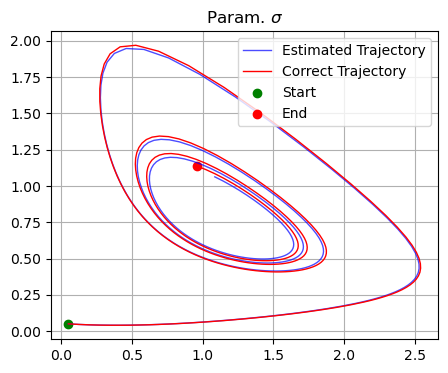

In [9]:
# evaluation
n_sample = 25
rmse_sigma, _ = SINDy_data.evaluate_RMSE(model_sigma, ode, freq, n_sample, [0.1, 0.1, 0.15], [0, 0, 0.05])
print('Best Model RMSE: ', rmse_sigma)
# rmse_sigma_1, _ = SINDy_data.evaluate_RMSE(model_sigma_1, ode, freq, n_sample, [0.1, 0.1, 0.15], [0, 0, 0.05])
# print('Best Model 1 RMSE: ', rmse_sigma_1)

n_sample = 1
title = r'Param. $\sigma$'
SINDy_data.evaluate_traj(model_sigma, ode, freq, n_sample, [0.05, 0.05, 0.1], [0.05, 0.05, 0.1], dim_x, title=title)
# SINDy_data.evaluate_traj(model_sigma_1, ode, freq, n_sample, [0.05, 0.05, 0.1], [0.05, 0.05, 0.1], dim_x, title=title)

### Results:

Parametrization on $\rho$: non riesce ad identificare il modello corretto, lo approssima bene tramite il model 0. Nonostante la complessità, il model 0 generaliza bene anche rispetto a valori di $\rho$ al di fuori del range di training, come mostrato nei plot -> generalizza rispetto alla biforcazione!  
RMK. questo mette in luce l'affinità dell'equazione trovata e quella corretta, che sono entrambe equazioni polinomiali. Anche senza riuscire nell'identificare l'equazione corretta, il risultato trovato riesce ad approssimarlo coerentemente anche in casi test significamente diversi da quelli di training.

Parametrization on $\sigma$: il model 1 coincide, a meno di piccoli errori nel calolo dei coefficienti, con il modello target!

### dev:

In [11]:
# trajectory estimation:

# true trajectory:
dg_true = data.DataGenerator(ode, ode.T, freq=10, n_sample=1, noise_sigma=0., init_high=[0.05, 0.05, 0.1], init_low=[0.05, 0.05, 0.1])
xt_true = dg_true.xt

#estimated trajectory:
correct_param = 0.1
t = np.arange(0,ode.T,dt)
T_plot = len(t)
test_params = np.tile(correct_param, (T_plot,1))
pred_0 = model_0.simulate(xt_true[0, 0, :][:-1], t= t[:T_plot], u = test_params)
pred_1 = model_1.simulate(xt_true[0, 0, :][:-1], t= t[:T_plot], u = test_params)

xt_true = xt_true[:len(pred_0), :, :]
xt_true = xt_true[:, :, :-1]
xt_true = xt_true.squeeze()
print(np.shape(xt_true))
print(np.shape(pred_0))
print(np.shape(pred_1))

(149, 2)
(149, 2)
(149, 2)


Model 0 RMSE:  0.07170339348007775
Model 1 RMSE:  0.029742147241155825


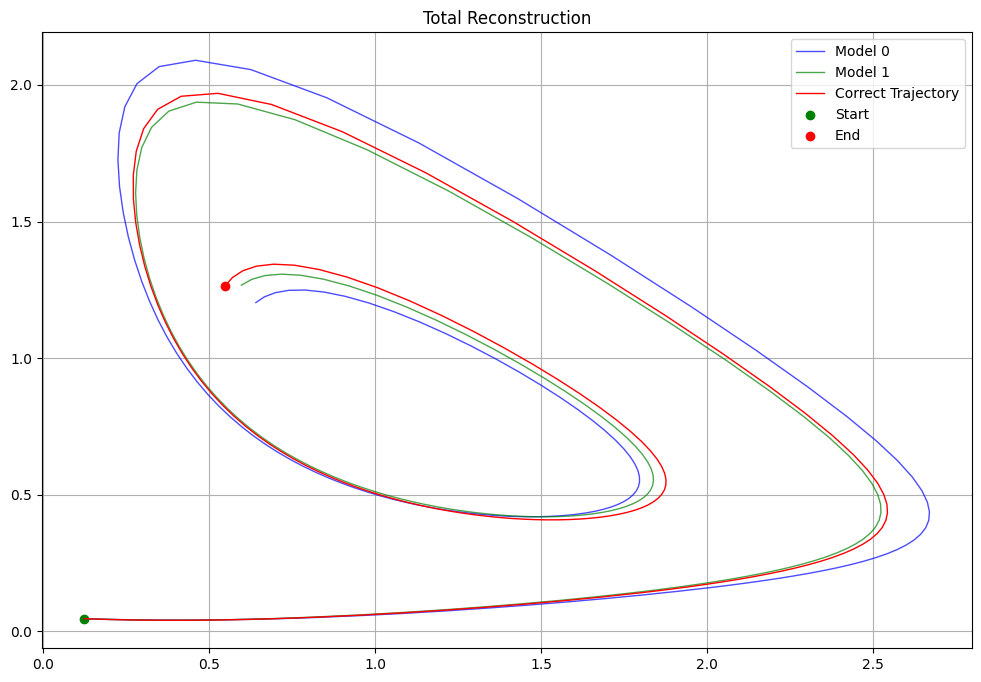

In [12]:
# RMSE:
rmse_0 = root_mean_squared_error(xt_true, pred_0) 
print('Model 0 RMSE: ', rmse_0)
rmse_1 = root_mean_squared_error(xt_true, pred_1)
print('Model 1 RMSE: ', rmse_1)

# plot:
plt.figure(figsize=(12, 8))

plt.plot(pred_0[:, 0], pred_0[:, 1], color='blue', linewidth=1.0, alpha=0.7, label='Model 0')
plt.plot(pred_1[:, 0], pred_1[:, 1], color='green', linewidth=1.0, alpha=0.7, label='Model 1')

plt.plot(xt_true[:, 0], xt_true[:, 1], color='red', linewidth=1.0, label='Correct Trajectory')
plt.scatter(xt_true[:, 0][0], xt_true[:, 1][0], color='green', label='Start')
plt.scatter(xt_true[:, 0][-1], xt_true[:, 1][-1], color='red', label='End')

plt.title('Total Reconstruction')
plt.legend()
plt.grid(True) 

In [ ]:
np.random.seed(999)

ode = equations.get_ode(ode_name, ode_param)
T = ode.T
init_low = ode.init_low # [0, 0, 0.7]
init_high = ode.init_high # [0.1, 0.1, 0.8]
has_coef = ode.has_coef # True
noise_sigma = ode.std_base * noise_ratio

# data simulation: 
dg = data.DataGenerator(ode, T, freq, n_sample, noise_sigma, init_low, init_high) 
yt = dg.generate_data()
print(np.shape(yt)) 
print(yt[0:20, 0, 0]) 
print(yt[0:20, 0, 1]) 
print(yt[0:20, 0, 2])


# numerical differentiation:
if noise_sigma == 0:
    dxdt_hat = (yt[1:, :, :] - yt[:-1, :, :]) / (dg.solver.t[1:] - dg.solver.t[:-1])[:, None, None]
else:
    dxdt_hat = num_diff(yt, dg, alg)
print(np.shape(dxdt_hat))

print('Numerical differentiation: Done.')

In [ ]:
######################      PREPARE DATA for SINDy       ######################
# target: 
# X_list: (50, 150, 2)
# dX_list: (50, 150, 2)
# param_list: (50, 150)

X_train = yt[:-1, :, :-1]
X_train = np.transpose(X_train, (1, 0, 2))
dX_train = dxdt_hat[:, :, :-1]
dX_train = np.transpose(dX_train, (1, 0, 2))
param_train = yt[:-1, :, -1]
param_train = np.transpose(param_train, (1, 0))

X_list = []
dX_list = []
param_list = []
n_train = len(X_train)

for i in range(n_train):
    X_list.append(X_train[i])
    dX_list.append(dX_train[i])
    param_list.append(param_train[i])

feature_names = ["x1", "x2"]
feature_names +=  ["rho"]

print(np.shape(X_list))
print(np.shape(dX_list))
print(np.shape(param_list))